In [1]:
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import math
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 데이터 불러오기

In [53]:
filepath = '/content/drive/Shareddrives/팔당댐/combined_data/combined_train_test_filled_cleansed.csv'
df = pd.read_csv(filepath, index_col='ymdhm', parse_dates=['ymdhm'])
df

,swl,inf,sfw,ecpc,tototf,tide_level,wl_1018662,fw_1018662,wl_1018680,fw_1018680,wl_1018683,fw_1018683,wl_1019630,fw_1019630,rf_10184100,rf_10184110,rf_10184140
ymdhm,,,,,,,,,,,,,,,,,
2012-05-01 00:00:00,24.800,555.00,219.07,24.93,555.00,445.0,310.7,469.05,300.2,0.0,290.0,729.80,275.3,540.18,0.0,0.0,0.0
2012-05-01 00:10:00,24.794,464.60,218.86,25.15,562.90,449.0,314.7,498.00,300.2,0.0,290.0,731.48,275.3,540.18,0.0,0.0,0.0
2012-05-01 00:20:00,24.789,478.10,218.69,25.31,576.40,451.0,313.7,490.68,301.2,0.0,290.0,726.42,275.3,540.18,0.0,0.0,0.0
2012-05-01 00:30:00,24.789,464.80,218.69,25.31,563.10,452.0,311.7,476.21,301.2,0.0,290.0,726.42,276.3,552.17,0.0,0.0,0.0
2012-05-01 00:40:00,24.789,478.10,218.69,25.31,576.40,450.0,311.7,476.21,301.2,0.0,291.0,707.17,277.3,564.29,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-18 23:10:00,25.040,259.23,212.86,31.14,259.23,510.0,288.0,319.84,295.0,0.0,299.0,-456.41,306.0,974.40,0.0,0.0,0.0
2022-07-18 23:20:00,25.040,260.46,212.86,31.14,260.46,492.0,287.0,314.01,303.0,0.0,304.0,-717.30,308.0,1006.88,0.0,0.0,0.0
2022-07-18 23:30:00,25.040,259.37,212.86,31.14,259.37,475.0,299.0,387.55,307.0,0.0,309.0,-843.37,310.0,1039.90,0.0,0.0,0.0


In [54]:
#fw_1018680는 원래 없는 자료이므로 삭제
df.drop('fw_1018680', axis=1, inplace=True)
df.drop('swl', axis=1, inplace=True)
df.drop('sfw', axis=1, inplace=True)
df.drop('tide_level', axis=1, inplace=True)
df.drop('ecpc', axis=1, inplace=True)

df.drop('rf_10184100', axis=1, inplace=True)
df.drop('rf_10184110', axis=1, inplace=True)
df.drop('rf_10184140', axis=1, inplace=True)


In [55]:
df.corr(method = 'pearson')

,inf,tototf,wl_1018662,fw_1018662,wl_1018680,wl_1018683,fw_1018683,wl_1019630,fw_1019630
inf,1.000000,0.984520,0.882496,0.900658,0.859963,0.848201,0.894672,0.792667,0.872786
tototf,0.984520,1.000000,0.890549,0.907994,0.867177,0.855475,0.901950,0.800156,0.878860
wl_1018662,0.882496,0.890549,1.000000,0.961238,0.991275,0.991074,0.829013,0.950057,0.937539
fw_1018662,0.900658,0.907994,0.961238,1.000000,0.946692,0.940956,0.852113,0.890283,0.925061
wl_1018680,0.859963,0.867177,0.991275,0.946692,1.000000,0.995351,0.799548,0.958501,0.936834
wl_1018683,0.848201,0.855475,0.991074,0.940956,0.995351,1.000000,0.780319,0.972709,0.937806
fw_1018683,0.894672,0.901950,0.829013,0.852113,0.799548,0.780319,1.000000,0.694457,0.805351
wl_1019630,0.792667,0.800156,0.950057,0.890283,0.958501,0.972709,0.694457,1.000000,0.930358
fw_1019630,0.872786,0.878860,0.937539,0.925061,0.936834,0.937806,0.805351,0.930358,1.000000


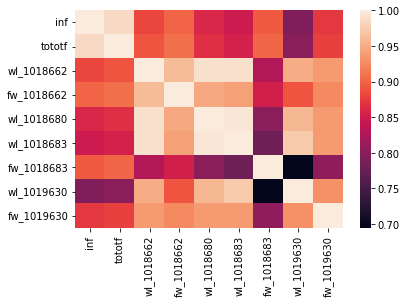

In [56]:
import seaborn as sns
sns.heatmap(df.corr())

In [57]:
df.describe()

,inf,tototf,wl_1018662,fw_1018662,wl_1018680,wl_1018683,fw_1018683,wl_1019630,fw_1019630
count,276336.000000,276336.000000,276336.000000,276336.000000,276336.000000,276336.000000,276336.000000,276336.000000,276336.000000
mean,548.548083,542.036770,329.232797,746.826551,316.071760,312.590404,600.970021,299.979812,1056.807758
std,1110.978412,1104.317791,76.559900,1077.388189,67.495669,63.883452,1376.848129,51.442783,1428.279212
min,-807.500000,-222.000000,259.700000,243.290000,246.200000,247.000000,-3522.710000,241.300000,212.040000
25%,127.417500,132.000000,287.700000,319.840000,278.200000,275.000000,205.082500,267.300000,449.120000
50%,249.570000,174.980000,307.000000,441.000000,297.200000,295.000000,355.980000,286.300000,679.420000
75%,530.000000,505.000000,342.700000,725.690000,330.200000,328.000000,709.710000,316.300000,1142.220000
max,25991.500000,25791.500000,1287.700000,9405.640000,1146.200000,1080.000000,25289.170000,843.300000,29854.120000


In [58]:
df.isnull().sum()

inf           0
tototf        0
wl_1018662    0
fw_1018662    0
wl_1018680    0
wl_1018683    0
fw_1018683    0
wl_1019630    0
fw_1019630    0
dtype: int64

# data shift 하고 train, test 데이터 나누기

In [59]:
sub = pd.read_csv('/content/drive/Shareddrives/팔당댐/competition_data/sample_submission.csv',index_col=0)

In [60]:
sub.head()

,wl_1018662,wl_1018680,wl_1018683,wl_1019630
ymdhm,,,,
2022-06-01 00:00,0,0,0,0
2022-06-01 00:10,0,0,0,0
2022-06-01 00:20,0,0,0,0
2022-06-01 00:30,0,0,0,0
2022-06-01 00:40,0,0,0,0


In [61]:
df.sort_index(inplace=True)
sub.sort_index(inplace=True)

In [62]:
label = df.loc[:,sub.columns]
data = df.drop(sub.columns,axis=1)

In [63]:
label

,wl_1018662,wl_1018680,wl_1018683,wl_1019630
ymdhm,,,,
2012-05-01 00:00:00,310.7,300.2,290.0,275.3
2012-05-01 00:10:00,314.7,300.2,290.0,275.3
2012-05-01 00:20:00,313.7,301.2,290.0,275.3
2012-05-01 00:30:00,311.7,301.2,290.0,276.3
2012-05-01 00:40:00,311.7,301.2,291.0,277.3
...,...,...,...,...
2022-07-18 23:10:00,288.0,295.0,299.0,306.0
2022-07-18 23:20:00,287.0,303.0,304.0,308.0
2022-07-18 23:30:00,299.0,307.0,309.0,310.0


In [64]:
data

,inf,tototf,fw_1018662,fw_1018683,fw_1019630
ymdhm,,,,,
2012-05-01 00:00:00,555.00,555.00,469.05,729.80,540.18
2012-05-01 00:10:00,464.60,562.90,498.00,731.48,540.18
2012-05-01 00:20:00,478.10,576.40,490.68,726.42,540.18
2012-05-01 00:30:00,464.80,563.10,476.21,726.42,552.17
2012-05-01 00:40:00,478.10,576.40,476.21,707.17,564.29
...,...,...,...,...,...
2022-07-18 23:10:00,259.23,259.23,319.84,-456.41,974.40
2022-07-18 23:20:00,260.46,260.46,314.01,-717.30,1006.88
2022-07-18 23:30:00,259.37,259.37,387.55,-843.37,1039.90


In [65]:
# data와 label 하나 밀어주기 (과거데이터를 사용해야 함으로)
y = label.reset_index(drop=True)
X = data.reset_index(drop=True)

X.index += 1

tot=pd.concat((X,y),axis=1)
tot=tot.sort_index()

tot=tot.iloc[1:-1]

label = tot.loc[:,sub.columns]
data = tot.drop(sub.columns,axis=1)

In [66]:
train_label=label.iloc[:-len(sub),:]
test_label=label.iloc[-len(sub):,:]

train_data=data.iloc[:-len(sub),:]
test_data=data.iloc[-len(sub):,:]

In [67]:
train_data # ~2022-05-31까지

,inf,tototf,fw_1018662,fw_1018683,fw_1019630
1,555.00,555.00,469.05,729.80,540.18
2,464.60,562.90,498.00,731.48,540.18
3,478.10,576.40,490.68,726.42,540.18
4,464.80,563.10,476.21,726.42,552.17
5,478.10,576.40,476.21,707.17,564.29
...,...,...,...,...,...
269419,140.89,140.89,314.01,597.98,471.08
269420,140.94,140.94,285.72,575.57,493.58
269421,141.07,141.07,274.78,501.04,505.03
269422,141.01,141.01,269.40,425.89,505.03


In [68]:
train_label

,wl_1018662,wl_1018680,wl_1018683,wl_1019630
1,314.7,300.2,290.0,275.3
2,313.7,301.2,290.0,275.3
3,311.7,301.2,290.0,276.3
4,311.7,301.2,291.0,277.3
5,311.7,301.2,291.0,277.3
...,...,...,...,...
269419,281.7,281.2,278.0,271.3
269420,279.7,279.2,278.0,272.3
269421,278.7,277.2,277.0,272.3
269422,277.7,276.2,276.0,271.3


In [69]:
test_data # 2022-06-01 ~

,inf,tototf,fw_1018662,fw_1018683,fw_1019630
269424,140.56,140.56,269.40,70.09,482.26
269425,140.60,140.60,269.40,8.23,471.08
269426,140.78,140.78,280.22,28.82,449.12
269427,755.90,140.90,296.87,12.35,417.17
269428,0.00,140.94,302.53,53.52,386.43
...,...,...,...,...,...
276331,865.96,259.30,319.84,25.27,926.70
276332,259.23,259.23,319.84,-456.41,974.40
276333,260.46,260.46,314.01,-717.30,1006.88
276334,259.37,259.37,387.55,-843.37,1039.90


In [70]:
#scaler = StandardScaler()
#minmax = MinMaxScaler()

In [71]:
#x_train_std = scaler.fit_transform(train_data) # 학습데이터 feature scaling
#x_test_std = scaler.transform(test_data)

In [72]:
# x_train_minmax = minmax.fit_transform(train_data) # 학습데이터 feature scaling
# x_test_minmax = minmax.transform(test_data)

In [73]:
# train_data = x_train_minmax
# test_data = x_test_minmax

In [74]:
#train_data = x_train_std
#test_data = x_test_std

# train, test 데이터 나누기 (X)
- 2022-05-31 까지 train
- 2022-06-01 부터 test 데이터로 사용


In [75]:
#train_data = df.loc[:'2022-05-31',
#                 ['swl', 'inf', 'sfw', 'ecpc', 'tototf', 'tide_level', 'fw_1018662', 'fw_1018680', 
#                  'fw_1018683','fw_1019630', 'rf_10184100', 'rf_10184110', 'rf_10184140']]
#train_label = df.loc[:'2022-05-31',['wl_1018662', 'wl_1018680', 'wl_1018683', 'wl_1019630']]

# X_train, y_train

In [76]:
#train_data

In [77]:
#test_data = df.loc['2022-06-01':,  
#                   ['swl', 'inf', 'sfw', 'ecpc', 'tototf', 'tide_level', 'fw_1018662', 'fw_1018680', 
#                   'fw_1018683','fw_1019630', 'rf_10184100', 'rf_10184110', 'rf_10184140']]
#test_label = df.loc['2022-06-01': , ['wl_1018662', 'wl_1018680', 'wl_1018683', 'wl_1019630']]

# X_test, y_test

In [78]:
#test_data

# 하이퍼 파라미터

In [ ]:
knn = KNeighborsRegressor()
param_grid = [{'n_neighbors': range(1,20), 'weights':['uniform', 'distance'], 'algorithm': [ 'ball_tree', 'kd_tree', 'brute'],
               'leaf_size' : [50, 100], 'metric': ['cityblock',
'cosine',
'euclidean',
'haversine',
'l1',
'l2',
'manhattan',
'nan_euclidean'], 'p':[1,2]
               }] 
grid_cv = GridSearchCV(estimator=knn, param_grid=param_grid, scoring='r2', cv=5, n_jobs=-1)
grid_cv.fit(train_data, train_label)

print('최적 하이퍼 파라미터:', grid_cv.best_params_)
print('최적 예측 정확도:', grid_cv.best_score_)

In [ ]:
'cityblock',
'cosine',
'euclidean',
'haversine',
'l1',
'l2',
'manhattan',
'nan_euclidean'

최적 하이퍼 파라미터: {'n_neighbors': 19}
최적 예측 정확도: 0.9886472774751205

최적 하이퍼 파라미터: {'n_neighbors': 18}
최적 예측 정확도: 0.9886520136126551

# 모델 학습

In [ ]:
model = grid_cv.best_estimator_

In [87]:
kn = KNeighborsRegressor(n_neighbors= 18, weights='distance', algorithm='kd_tree', 
leaf_size=300, p=1, metric='euclidean', n_jobs=-1)
kn.fit(train_data, train_label)

KNeighborsRegressor(algorithm='kd_tree', leaf_size=300, metric='euclidean',
                    n_jobs=-1, n_neighbors=18, p=1, weights='distance')

# 모델 성능

In [88]:
# train rmse
train_predict = kn.predict(train_data)
print("RMSE':{}".format(math.sqrt(mean_squared_error(train_label,train_predict))))
 
# test rmse
y_preds_rnd = kn.predict(test_data)
print("RMSE':{}".format(math.sqrt(mean_squared_error(test_label, y_preds_rnd))))

RMSE':0.0467683902656145
RMSE':4.9623780919279215


In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# %matplotlib inline

# ftr_importances_values = model.feature_importances_
# ftr_importances = pd.Series(ftr_importances_values, index=train_data.columns)
# ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

# plt.figure(figsize=(8,6))
# plt.title('Top 20 Feature Importances')
# sns.barplot(x=ftr_top20, y=ftr_top20.index)
# plt.show()


In [ ]:
r2_score_train = model.score(train_data, train_label)
print('훈련세트에서의 R^2 점수 : {0:2f}'.format(r2_score_train))

훈련세트에서의 R^2 점수 : 0.995988


In [ ]:
r2_score = model.score(test_data, test_label)
print('테스트세트에서의 R^2 점수 : {0:2f}'.format(r2_score))

테스트세트에서의 R^2 점수 : 0.995954


# 테스트세트 예측결과 샘플 출력


In [ ]:
test_label['wl_1018662']
test_label['wl_1018680']
test_label['wl_1018683']
test_label['wl_1019630']


269424    269.0
269425    267.0
269426    264.0
269427    261.0
269428    259.0
          ...  
276331    306.0
276332    308.0
276333    310.0
276334    312.0
276335    313.0
Name: wl_1019630, Length: 6912, dtype: float64

In [ ]:
test_label['wl_1018662'][0]


279.0

# 예측

In [ ]:
pred_df = pd.DataFrame(y_preds_rnd)
pred_df.head()

,0,1,2,3
0,279.088889,272.033333,270.000000,269.188889
1,280.644444,274.311111,273.000000,268.188889
2,281.866667,272.533333,270.500000,266.077778
3,280.755556,276.255556,271.611111,260.133333
4,285.088889,272.255556,270.000000,259.911111


In [ ]:
pred_df.shape

(6912, 4)

# 제출양식

In [ ]:
sub_df = pd.read_csv('/content/drive/Shareddrives/팔당댐/competition_data/sample_submission.csv',index_col=0)
sub_df.head()

,wl_1018662,wl_1018680,wl_1018683,wl_1019630
ymdhm,,,,
2022-06-01 00:00,0,0,0,0
2022-06-01 00:10,0,0,0,0
2022-06-01 00:20,0,0,0,0
2022-06-01 00:30,0,0,0,0
2022-06-01 00:40,0,0,0,0


In [ ]:
sub_df.shape

(6912, 4)

In [ ]:
sub_df['wl_1018662'] = pred_df[0]
sub_df['wl_1018680'] = pred_df[1]
sub_df['wl_1018683'] = pred_df[2]
sub_df['wl_1019630'] = pred_df[3]

In [ ]:
sub_df.head()

,wl_1018662,wl_1018680,wl_1018683,wl_1019630
ymdhm,,,,
2022-06-01 00:00,NaN,NaN,NaN,NaN
2022-06-01 00:10,NaN,NaN,NaN,NaN
2022-06-01 00:20,NaN,NaN,NaN,NaN
2022-06-01 00:30,NaN,NaN,NaN,NaN
2022-06-01 00:40,NaN,NaN,NaN,NaN


In [ ]:
sub_df = sub_df.astype(float)

In [ ]:
pred_df.columns = sub_df.columns

In [ ]:
pred_df.index = sub_df.index

In [ ]:
pred_df.head()

,wl_1018662,wl_1018680,wl_1018683,wl_1019630
ymdhm,,,,
2022-06-01 00:00,278.7,269.7,270.0,267.8
2022-06-01 00:10,280.2,276.7,274.5,267.3
2022-06-01 00:20,280.7,275.2,272.5,264.3
2022-06-01 00:30,283.2,277.7,273.5,261.3
2022-06-01 00:40,285.2,279.7,274.5,260.3


In [ ]:
pred_df.to_csv('/content/drive/Shareddrives/팔당댐/제출/KNN_Regression.csv')

In [ ]:
pred_df.to_csv('/content/drive/MyDrive/팔당댐/KNN_Regression2.csv')

# 비교

In [ ]:
filename = '/content/drive/Shareddrives/팔당댐/combined_data/combined_train_test_filled.csv'
dff = pd.read_csv(filename, index_col='ymdhm', parse_dates=['ymdhm'])
dff.tail()

,swl,inf,sfw,ecpc,tototf,tide_level,wl_1018662,fw_1018662,wl_1018680,fw_1018680,wl_1018683,fw_1018683,wl_1019630,fw_1019630,rf_10184100,rf_10184110,rf_10184140
ymdhm,,,,,,,,,,,,,,,,,
2022-07-18 23:10:00,25.04,259.23,212.86,31.14,259.23,510.0,288.0,319.84,295.0,NaN,299.0,-456.41,306.0,974.40,0.0,0.0,0.0
2022-07-18 23:20:00,25.04,260.46,212.86,31.14,260.46,492.0,287.0,314.01,303.0,NaN,304.0,-717.30,308.0,1006.88,0.0,0.0,0.0
2022-07-18 23:30:00,25.04,259.37,212.86,31.14,259.37,475.0,299.0,387.55,307.0,NaN,309.0,-843.37,310.0,1039.90,0.0,0.0,0.0
2022-07-18 23:40:00,25.04,259.13,212.86,31.14,259.13,458.0,309.0,454.91,311.0,NaN,314.0,-1023.37,312.0,1073.46,0.0,0.0,0.0
2022-07-18 23:50:00,25.04,258.16,212.86,31.14,258.16,442.0,326.0,582.21,314.0,NaN,317.0,-1049.44,313.0,1090.45,0.0,0.0,0.0


In [ ]:
dff.loc['2022-06-01': , ['wl_1018662', 'wl_1018680', 'wl_1018683', 'wl_1019630']].head()

,wl_1018662,wl_1018680,wl_1018683,wl_1019630
ymdhm,,,,
2022-06-01 00:00:00,279.0,276.0,274.0,269.0
2022-06-01 00:10:00,281.0,277.0,274.0,267.0
2022-06-01 00:20:00,284.0,277.0,274.0,264.0
2022-06-01 00:30:00,285.0,277.0,274.0,261.0
2022-06-01 00:40:00,284.0,278.0,274.0,259.0


In [ ]:
pred_df.head()

,wl_1018662,wl_1018680,wl_1018683,wl_1019630
ymdhm,,,,
2022-06-01 00:00,278.7,269.7,270.0,267.8
2022-06-01 00:10,280.2,276.7,274.5,267.3
2022-06-01 00:20,280.7,275.2,272.5,264.3
2022-06-01 00:30,283.2,277.7,273.5,261.3
2022-06-01 00:40,285.2,279.7,274.5,260.3


In [ ]:
pred_df.head()

,wl_1018662,wl_1018680,wl_1018683,wl_1019630
ymdhm,,,,
2022-06-01 00:00,280.331579,271.463158,271.947368,268.457895
2022-06-01 00:10,281.278947,270.515789,270.157895,267.142105
2022-06-01 00:20,282.331579,277.936842,272.421053,261.563158
2022-06-01 00:30,282.963158,270.831579,270.157895,261.615789
2022-06-01 00:40,282.805263,269.568421,268.105263,259.036842
